# **Activating Your Neural Network: Choosing the Right Activation Function**

6/6 [==============================] - 0s 3ms/step
Best Activation Function: relu
Best k0: 0.0
Best k1: 0.2222222222222222
Best F1-Score: 0.9953917050691244
6/6 [==============================] - 0s 2ms/step
Best Activation Function: relu
Best k0: 0.0
Best k1: 0.2222222222222222
Train Loss: 0.06668916344642639
Train Accuracy: 0.9849246144294739
Test Loss: 0.049331337213516235
Test Accuracy: 0.9941520690917969
Train F1-Score: 0.9880000000000001
Test F1-Score: 0.9953917050691244
Train Confusion Matrix:
[[145   4]
 [  2 247]]
Test Confusion Matrix:
[[ 62   1]
 [  0 108]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.98      0.99      0.99       249

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

Test Classification Report:
              precision    recall  f1-sco

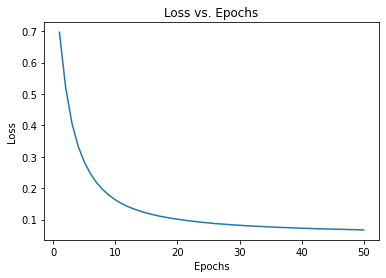

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid, tanh
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Preprocess the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encoding categorical data
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42,stratify=y)

# Define the flexible activation function
def flexible_act(x, k0, k1):
    return k0 + k1 * x

# Define the list of activation functions to compare
activation_functions = [relu, sigmoid, tanh]

# Define the range of parameters k0 and k1 to explore
k0_range = np.linspace(0, 2, 10)
k1_range = np.linspace(0, 2, 10)

# Evaluate performance for each activation function and parameter combination
best_activation = None
best_k0 = None
best_k1 = None
best_f1_score = 0.0

for activation in activation_functions:
    for k0 in k0_range:
        for k1 in k1_range:
            # Create the model with the current activation function
            model = Sequential()
            model.add(Dense(units=64, input_dim=X.shape[1], activation=lambda x: flexible_act(x, k0, k1)))
            model.add(Dense(units=1, activation='sigmoid'))

            # Compile the model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, epochs=50, verbose=0)

            # Evaluate the model on test set
            y_pred = model.predict(X_test)
            y_pred = np.round(y_pred).flatten()

            # Calculate F1-score
            f1 = f1_score(y_test, y_pred)

            # Check if the current activation and parameters yield the best F1-score
            if f1 > best_f1_score:
                best_activation = activation.__name__
                best_k0 = k0
                best_k1 = k1
                best_f1_score = f1

# Print the best activation function and parameters
print("Best Activation Function:", best_activation)
print("Best k0:", best_k0)
print("Best k1:", best_k1)
print("Best F1-Score:", best_f1_score)

# Plot the loss vs. epochs for the best activation function and parameters
model = Sequential()
model.add(Dense(units=64, input_dim=X.shape[1], activation=lambda x: flexible_act(x, best_k0, best_k1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model on train and test sets
y_train_pred = model.predict(X_train)
y_train_pred = np.round(y_train_pred).flatten()
y_test_pred = model.predict(X_test)
y_test_pred = np.round(y_test_pred).flatten()

# Calculate performance metrics
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
classification_rep_train = classification_report(y_train, y_train_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the results
print("Best Activation Function:", best_activation)
print("Best k0:", best_k0)
print("Best k1:", best_k1)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Train F1-Score:', f1_train)
print('Test F1-Score:', f1_test)
print('Train Confusion Matrix:')
print(cm_train)
print('Test Confusion Matrix:')
print(cm_test)
print('Train Classification Report:')
print(classification_rep_train)
print('Test Classification Report:')
print(classification_rep_test)

# Plot the loss vs. epochs
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()
